# DATA CLEANING

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
# Load Dataset
df = pd.read_csv("netflix_titles.csv")
df.head()

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        8807 non-null   object 
 1   type           8807 non-null   object 
 2   title          8807 non-null   object 
 3   director       8807 non-null   object 
 4   cast           8807 non-null   object 
 5   country        8807 non-null   object 
 6   date_added     8807 non-null   object 
 7   release_year   8807 non-null   int64  
 8   rating         8807 non-null   object 
 9   duration       8807 non-null   object 
 10  listed_in      8807 non-null   object 
 11  description    8807 non-null   object 
 12  duration_int   8807 non-null   float64
 13  duration_type  8807 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 963.4+ KB


In [209]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
duration_int,8807.0,69.823095,50.822520,0.0,2.0,88.0,106.0,312.0


In [138]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_int     0
duration_type    0
dtype: int64

# Missing Values

In [87]:
# Fill rating with mode
df['rating'].fillna(df['rating'].mode()[0])

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [90]:
# Fill director, cast, country with 'Unknown'
df[col].fillna("Unknown")

0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [88]:
# Fill date_added with mode date
df['date_added'].fillna(df['date_added'].mode()[0])

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [133]:
df['release_year'].fillna(0)

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

In [130]:
df['duration_int'].fillna(0)

0        90.0
1         2.0
2         1.0
3         1.0
4         2.0
        ...  
8802    158.0
8803      2.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_int, Length: 8807, dtype: float64

# Data Types

In [111]:
# Convert Data Types
pd.to_datetime(df['date_added'], errors='coerce')

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [112]:
# Convert Data Types
df['duration'].str.extract(r'(\d+)').astype(float)

,0
0,90.0
1,2.0
2,1.0
3,1.0
4,2.0
...,...
8802,158.0
8803,2.0
8804,88.0
8805,88.0


In [113]:
# Convert Data Types
df['duration'].str.extract(r'(min|Season[s]?)', expand=False)

0           min
1       Seasons
2        Season
3        Season
4       Seasons
         ...   
8802        min
8803    Seasons
8804        min
8805        min
8806        min
Name: duration, Length: 8807, dtype: object

In [144]:
# drop duplicates
df.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20 00:00:00,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01 00:00:00,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


# Exploratory Data Analysis(EDA)

In [150]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [151]:
df['release_year'].value_counts().sort_index().tail(20)

release_year
2002      51
2003      61
2004      64
2005      80
2006      96
2007      88
2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64

In [164]:
df['listed_in'].str.split(', ', expand=True).stack().value_counts()
print(genres.head(20))


International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64


In [177]:
df['director'].replace('Unknown', np.nan).dropna().str.split(', ', expand=True)
print(directors.stack().value_counts().head(20))


Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Steven Spielberg       11
Don Michael Paul       10
David Dhawan            9
Yılmaz Erdoğan          9
Shannon Hartman         9
Anurag Kashyap          9
Umesh Mehra             8
Hakan Algül             8
Fernando Ayllón         8
Johnnie To              8
Name: count, dtype: int64


In [175]:
df['cast'].replace('Unknown', np.nan).dropna().str.split(', ', expand=True)
print(actors.stack().value_counts().head(20))


Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Amitabh Bachchan     28
Paresh Rawal         28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Andrea Libman        25
Kareena Kapoor       25
John Cleese          24
Samuel L. Jackson    24
Tara Strong          23
Jigna Bhardwaj       23
Name: count, dtype: int64


In [179]:
df[df['type'] == 'Movie']['duration_int']
print(movie_duration.describe())


count    6131.000000
mean       99.528462
std        28.369284
min         0.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_int, dtype: float64


In [180]:
print(df.corr(numeric_only=True))


              release_year  duration_int
release_year      1.000000     -0.249087
duration_int     -0.249087      1.000000


# Visualization

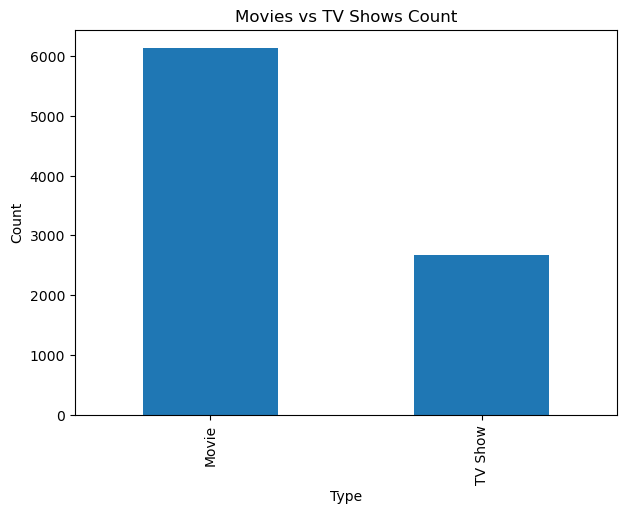

In [184]:
plt.figure(figsize=(7,5))
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows Count")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

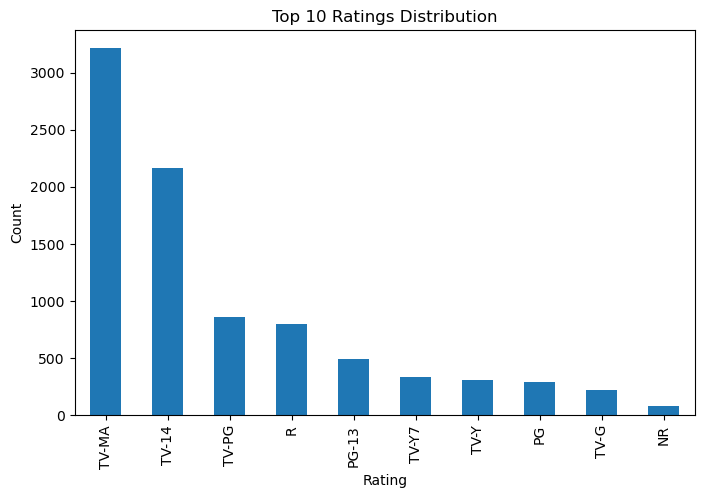

In [185]:
plt.figure(figsize=(8,5))
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

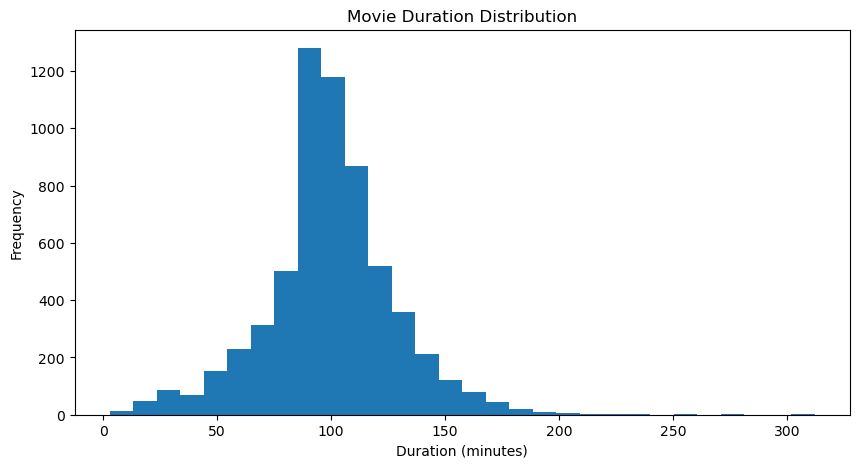

In [192]:
movies = df[df['type'] == "Movie"].copy()
movies['duration_num'] = movies['duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10,5))
movies['duration_num'].plot(kind='hist', bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

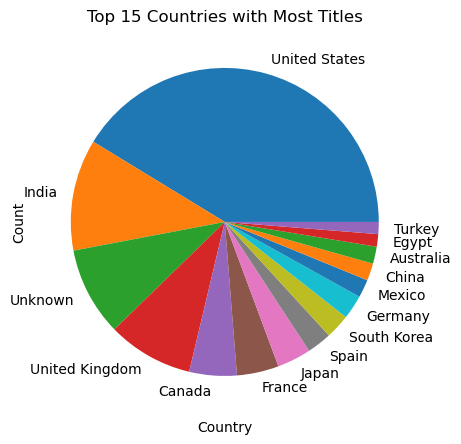

In [197]:
countries = df['country'].dropna().str.split(', ').explode().value_counts().head(15)

plt.figure(figsize=(12,5))
countries.plot(kind='pie')
plt.title("Top 15 Countries with Most Titles")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
genres.plot(kind='line')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()